In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
import warnings

warnings.filterwarnings("ignore")

In [4]:
from sklearn.preprocessing import StandardScaler


file_path = r"C:\Users\30393\Desktop\data.xlsx"
df = pd.read_excel(file_path, sheet_name='Apr_TA')


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
means = scaler.mean_
stds = scaler.scale_


stats_df = pd.DataFrame({
    'Column': numerical_columns,
    'Mean': means,
    'Std': stds
})


print(stats_df)

output_file_path = r"C:\Users\30393\Desktop\Apr_TA__scaler.xlsx"
df.to_excel(output_file_path, index=False)

      Column        Mean        Std
0       Year    2.026178   0.858798
1          R  124.290576  12.745110
2          G  135.102094   9.113525
3          B   26.149215   5.350538
4         NR    0.434325   0.019701
5         NG    0.473085   0.005396
6         NB    0.092590   0.022879
7         GB    5.418056   1.273419
8         RB    5.015578   1.341765
9         GR    1.091240   0.045241
10        BI  107.157503   8.375270
11       BIM   13.789944   0.445754
12       SCI   -0.043185   0.020590
13       GLI    0.284573   0.009943
14        HI    0.789628   0.108668
15     NGRDI    0.043185   0.020590
16     NDGBI    0.674962   0.068631
17     NDRBI    0.649111   0.084106
18         I  285.541885  18.468689
19         S    0.722229   0.068637
20      VARI    0.038760   0.017636
21       HUE   -1.555064   0.112942
22      HUE2   -1.566806   0.000653
23       BGI    0.196110   0.050137
24         L   95.180628   6.156230
25      GRAY  119.448822   8.702708
26      GLAI    2.471089   0

In [5]:
df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TA__scaler.xlsx")
from sklearn.model_selection import train_test_split

X = df.drop(['Year', 'Number', 'TA(mg/g)'], axis=1)
y = df['TA(mg/g)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


feature_importance = rf_model.feature_importances_
print("Feature Importance:", feature_importance)  


feature_importance_df = pd.DataFrame({                
'Feature': X.columns,                
'Importance': feature_importance
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


top_sixteen_features_df = feature_importance_df.head(16)

print(top_sixteen_features_df)

Feature Importance: [0.00281679 0.00773693 0.00631456 0.07747213 0.00654842 0.16069308
 0.02734023 0.010049   0.00154186 0.00282417 0.00133588 0.00127848
 0.00705394 0.00201769 0.00122894 0.06053723 0.03491005 0.00151532
 0.05203523 0.00171953 0.00578049 0.00641956 0.14503284 0.00094723
 0.00335117 0.00153965 0.00142428 0.08731658 0.00735303 0.13820536
 0.0061082  0.00276853 0.00059406 0.07225396 0.01071719 0.01233417
 0.01431094 0.00683874 0.00973457]
   Feature  Importance
5       NB    0.160693
22     BGI    0.145033
29   RminB    0.138205
27     SHP    0.087317
3       NR    0.077472
33   GminB    0.072254
15   NDGBI    0.060537
18       S    0.052035
16   NDRBI    0.034910
6       GB    0.027340
36      a*    0.014311
35      L*    0.012334
34  BplusG    0.010717
7       RB    0.010049
38      C*    0.009735
1        G    0.007737


In [7]:

output_file = 'top_sixteen_features_Apr_TA.xlsx'

try:
    
    top_sixteen_features_df.to_excel(output_file, index=False)
    print(f"\nThe first 16 important features have been successfully saved {output_file}")
    
except Exception as e:
    
    print(f"\nSave Failed: {e}")


The first 16 important features have been successfully saved top_sixteen_features_Apr_TA.xlsx


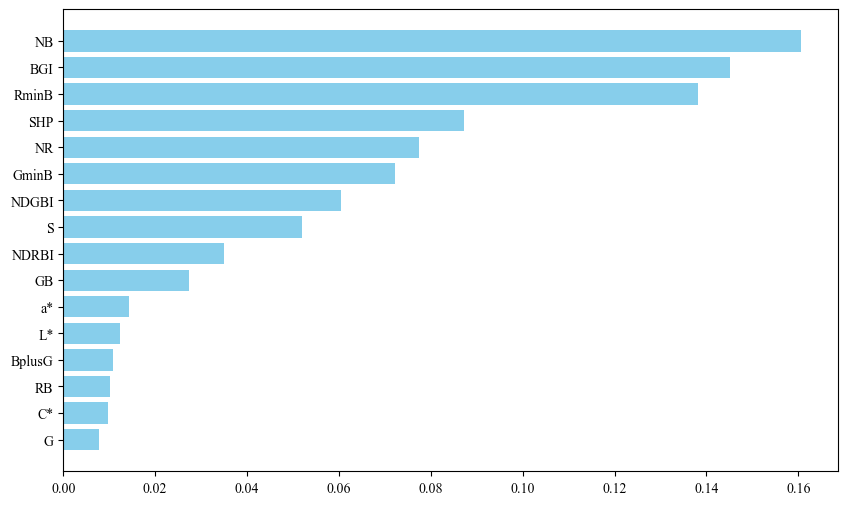

In [8]:
import os
plt.figure(figsize=(10, 6))
plt.barh(top_sixteen_features_df['Feature'], top_sixteen_features_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.savefig('Apr_TA_a.jpg', dpi=600, bbox_inches='tight')
plt.show()

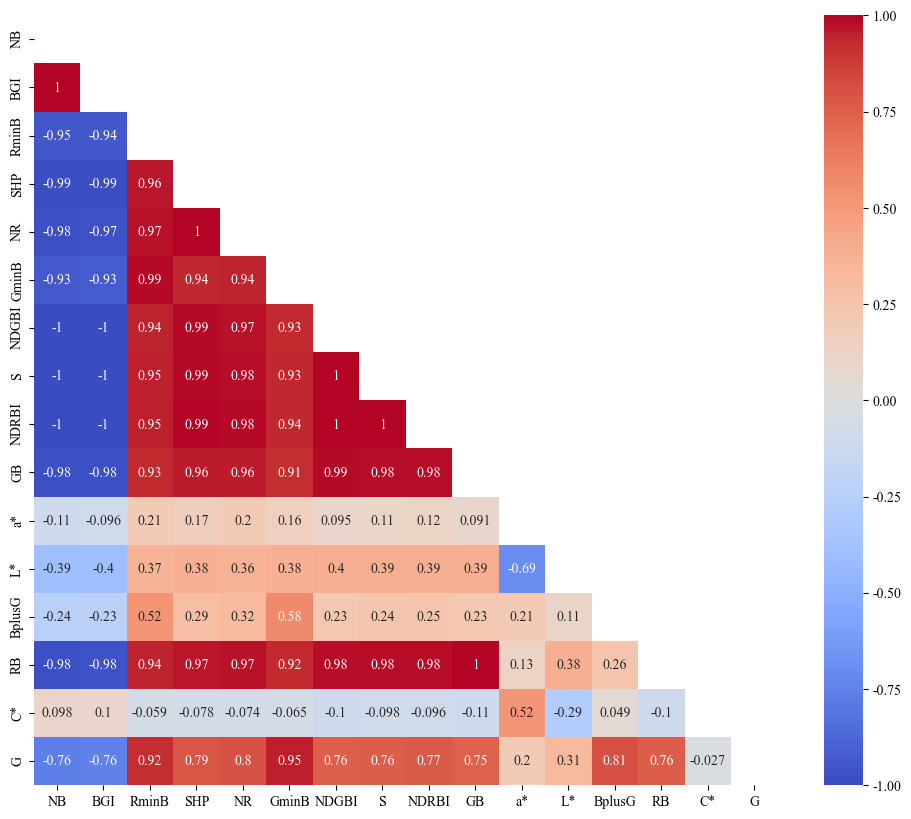

In [9]:
import seaborn as sns

correlation_matrix = X.corr(method='pearson')
top_sixteen_features = top_sixteen_features_df['Feature']



final_corr_matrix = correlation_matrix.loc[top_sixteen_features, top_sixteen_features]



plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(final_corr_matrix, dtype=bool))
sns.heatmap(final_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

plt.savefig('Apr_TA_b.jpg', dpi=600, bbox_inches='tight')

plt.show()


In [10]:
import pandas as pd

def select_top_features_by_correlation(corr_matrix, features, feature_importance_df, threshold=0.95):
    high_corr_pairs = []
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if abs(corr_matrix.loc[features[i], features[j]]) > threshold:
                high_corr_pairs.append((features[i], features[j]))

    features_to_remove = set()

    for pair in high_corr_pairs:
        importance_1 = feature_importance_df[feature_importance_df['Feature'] == pair[0]]['Importance'].values[0]
        importance_2 = feature_importance_df[feature_importance_df['Feature'] == pair[1]]['Importance'].values[0]

        if importance_1 < importance_2:
            features_to_remove.add(pair[0])
        else:
            features_to_remove.add(pair[1])

    filtered_features = [feature for feature in features if feature not in features_to_remove]
    return filtered_features

sorted_features = list(top_sixteen_features_df['Feature'][:16])

final_features = select_top_features_by_correlation(correlation_matrix, sorted_features, top_sixteen_features_df, threshold=0.95)
print(final_features)

['NB', 'RminB', 'a*', 'L*', 'BplusG', 'C*', 'G']


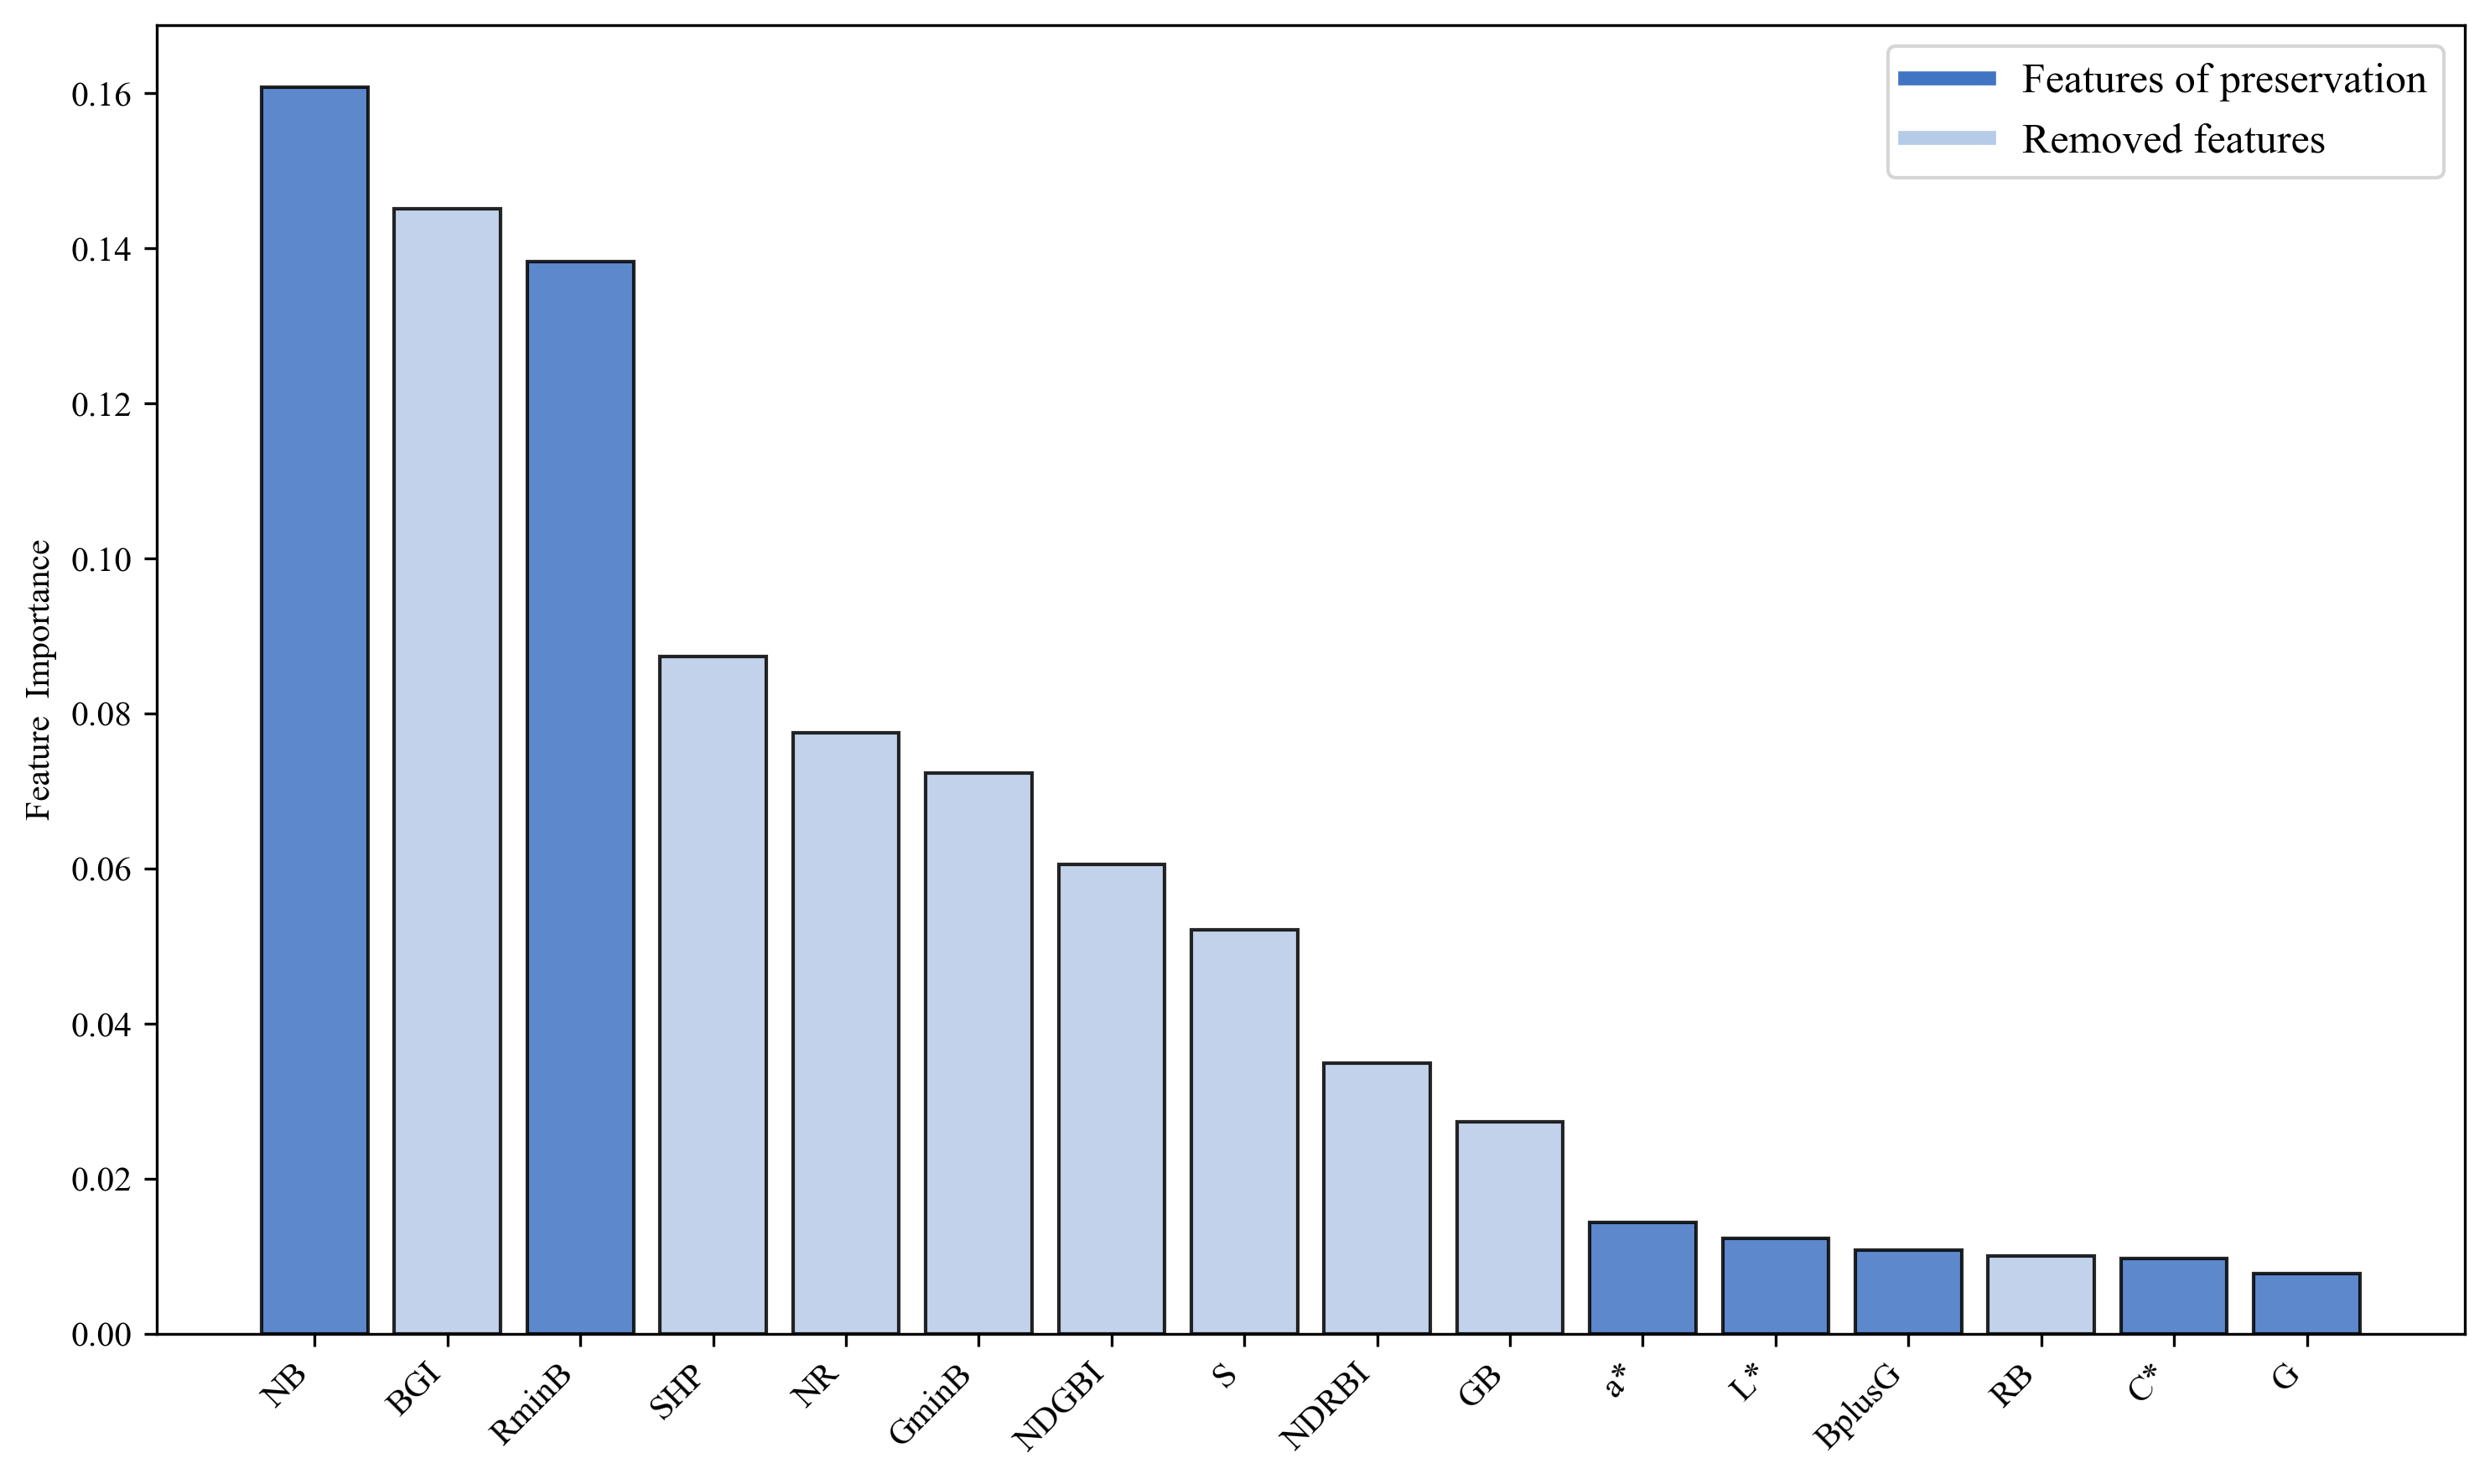

In [11]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, TextArea
import pandas as pd

feature_names = top_sixteen_features_df['Feature'].tolist()
feature_importances = feature_importance_df.iloc[0:16]['Importance']
selected_features = final_features

colors = [(65 / 255, 117 / 255, 196 / 255) if feature in selected_features else (182 / 255, 203 / 255, 231 / 255) 
          for feature in feature_names]

plt.figure(figsize=(10, 6), dpi=300)
bars = plt.bar(feature_names, feature_importances, color=colors, edgecolor='black', alpha=0.85)

red_patch = plt.Line2D([0], [0], color=(65 / 255, 117 / 255, 196 / 255), lw=4, label='Features of preservation')  
blue_patch = plt.Line2D([0], [0], color=(182 / 255, 203 / 255, 231 / 255), lw=4, label='Removed features')  
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=12)

plt.ylabel('Feature  Importance', fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.savefig('Apr_TA_c.jpg', dpi=600)
plt.show()

In [ ]:
#RF




In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    rf_model = RandomForestRegressor(random_state=42)
    
    cv_scores = cross_val_score(
        estimator=rf_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({                        
        'Features': selected_features,        
        'Num_Features': len(selected_features),        
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                    Features  Num_Features  CV Mean R^2
0       [NB, L*, BplusG, C*]             4     0.788437
1    [NB, L*, BplusG, C*, G]             5     0.786341
2        [NB, BplusG, C*, G]             4     0.786327
3           [NB, BplusG, C*]             3     0.786018
4       [NB, a*, BplusG, C*]             4     0.785819
..                       ...           ...          ...
122                 [a*, C*]             2    -0.140526
123                     [L*]             1    -0.189537
124                 [BplusG]             1    -0.196117
125                     [C*]             1    -0.401869
126                     [a*]             1    -0.461705

[127 rows x 3 columns]


best_combination is: ['NB', 'L*', 'BplusG', 'C*']


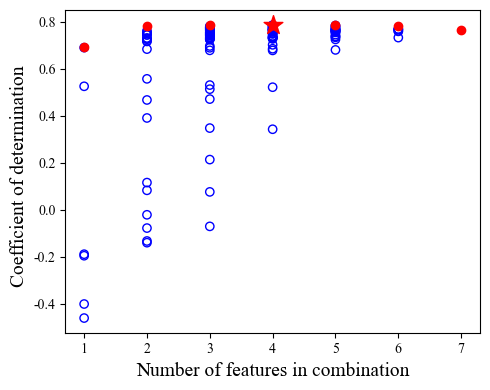

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TA_d.jpg', dpi=600)
plt.show()

In [ ]:
#svr




In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    svr_model = SVR(kernel='rbf')
    
    cv_scores = cross_val_score(
        estimator=svr_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({                        
        'Features': selected_features,        
        'Num_Features': len(selected_features),        
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                Features  Num_Features  CV Mean R^2
0           [NB, BplusG]             2     0.812994
1                [NB, G]             2     0.807898
2         [NB, RminB, G]             3     0.807807
3    [NB, RminB, BplusG]             3     0.806750
4            [NB, RminB]             2     0.806253
..                   ...           ...          ...
122             [BplusG]             1    -0.059784
123             [a*, C*]             2    -0.076963
124         [a*, BplusG]             2    -0.111422
125                 [C*]             1    -0.122131
126                 [a*]             1    -0.195396

[127 rows x 3 columns]


best_combination is: ['NB', 'BplusG']


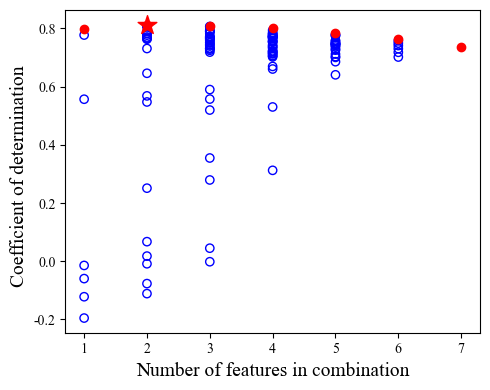

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TA_e.jpg', dpi=600)
plt.show()

In [ ]:
#mlp




In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        random_state=42,
        max_iter=200,
        early_stopping=True,
        n_iter_no_change=10,
        validation_fraction=0.1
    )
    
    cv_scores = cross_val_score(
        estimator=mlp_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({                        
        'Features': selected_features,        
        'Num_Features': len(selected_features),        
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                       Features  Num_Features  CV Mean R^2
0                          [NB]             1     0.775137
1    [NB, RminB, a*, BplusG, G]             5     0.759283
2                [NB, RminB, G]             3     0.757339
3            [RminB, BplusG, G]             3     0.749838
4    [NB, RminB, BplusG, C*, G]             5     0.749633
..                          ...           ...          ...
122                [BplusG, C*]             2     0.053934
123                [a*, BplusG]             2     0.041216
124                        [a*]             1    -0.001790
125                    [a*, C*]             2    -0.016939
126                        [C*]             1    -0.016982

[127 rows x 3 columns]


best_combination is: ['NB']


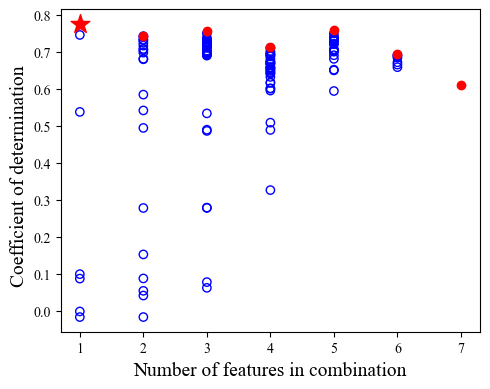

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TA_f.jpg', dpi=600)
plt.show()

In [ ]:
#xgb





In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    xgb_model = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=xgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({                        
        'Features': selected_features,        
        'Num_Features': len(selected_features),        
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                        Features  Num_Features  CV Mean R^2
0           [NB, L*, BplusG, C*]             4     0.773514
1       [NB, a*, L*, BplusG, C*]             5     0.760026
2           [NB, a*, L*, BplusG]             4     0.758824
3               [NB, a*, L*, C*]             4     0.758546
4    [NB, a*, L*, BplusG, C*, G]             6     0.758405
..                           ...           ...          ...
122                 [a*, BplusG]             2    -0.379358
123                 [BplusG, C*]             2    -0.394817
124                         [L*]             1    -0.807918
125                         [a*]             1    -0.845396
126                         [C*]             1    -0.872218

[127 rows x 3 columns]


best_combination is: ['NB', 'L*', 'BplusG', 'C*']


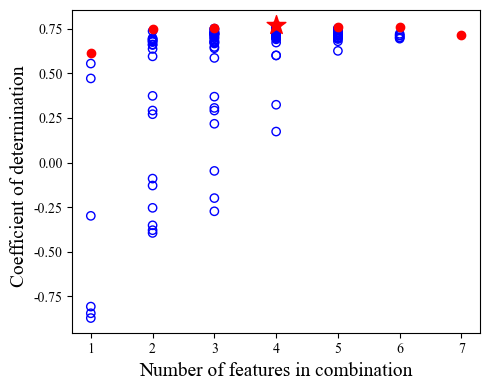

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TA_g.jpg', dpi=600)
plt.show()

In [ ]:
#lgb





In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    lgb_model = lgb.LGBMRegressor(
        objective='regression',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=lgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({                        
        'Features': selected_features,        
        'Num_Features': len(selected_features),        
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                    Features  Num_Features  CV Mean R^2
0        [NB, RminB, BplusG]             3     0.802124
1     [NB, RminB, BplusG, G]             4     0.800979
2            [NB, BplusG, G]             3     0.796690
3    [NB, RminB, BplusG, C*]             4     0.795752
4                [NB, RminB]             2     0.794752
..                       ...           ...          ...
122         [a*, BplusG, C*]             3    -0.008874
123             [BplusG, C*]             2    -0.032227
124                     [a*]             1    -0.057670
125                     [C*]             1    -0.062262
126                 [a*, C*]             2    -0.072886

[127 rows x 3 columns]


best_combination is: ['NB', 'RminB', 'BplusG']


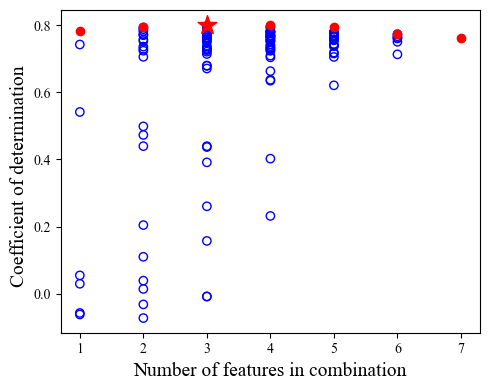

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TA_h.jpg', dpi=600)
plt.show()

In [24]:
#RF
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TA__scaler.xlsx")

selected_features = ['NB', 'L*','BplusG', 'C*']
X = df[selected_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7992 0.8568 0.7748 0.7647 0.7467], mean R² ± SD：0.7884 ± 0.0382
MAE ：[0.3439 0.2983 0.3398 0.3093 0.4284], mean MAE ± SD：0.3439 ± 0.0457
RMSE ：[0.4428 0.3684 0.4508 0.5122 0.5325], mean RMSE ± SD：0.4613 ± 0.0579


In [25]:
#svr
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TA__scaler.xlsx")

selected_features = ['NB', 'BplusG']
X = df[selected_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR(kernel='rbf')

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.8193 0.8577 0.7696 0.9015 0.7168], mean R² ± SD：0.813 ± 0.0648
MAE ：[0.3239 0.2643 0.3234 0.2585 0.4565], mean MAE ± SD：0.3253 ± 0.0713
RMSE ：[0.42   0.3672 0.4558 0.3314 0.5631], mean RMSE ± SD：0.4275 ± 0.0801


In [26]:
#mlp
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TA__scaler.xlsx")

selected_features = ['NB']
X = df[selected_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_model = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7927 0.755  0.813  0.8354 0.6796], mean R² ± SD：0.7751 ± 0.0546
MAE ：[0.3042 0.3527 0.3137 0.3198 0.5148], mean MAE ± SD：0.361 ± 0.0786
RMSE ：[0.45   0.4818 0.4107 0.4285 0.5989], mean RMSE ± SD：0.474 ± 0.0668


In [28]:
#xgb
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TA__scaler.xlsx")

selected_features = ['NB', 'L*', 'BplusG', 'C*']
X = df[selected_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.8456 0.8177 0.5782 0.8789 0.7471], mean R² ± SD：0.7735 ± 0.1069
MAE ：[0.3215 0.3342 0.4418 0.2921 0.4195], mean MAE ± SD：0.3618 ± 0.0583
RMSE ：[0.3883 0.4156 0.6168 0.3674 0.5321], mean RMSE ± SD：0.464 ± 0.0953


In [30]:
#lgb
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TA__scaler.xlsx")

selected_features = ['NB', 'RminB', 'BplusG']
X = df[selected_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(
    objective='regression',
    random_state=42,
    verbose=-1,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.8274 0.8099 0.7812 0.8442 0.7479], mean R² ± SD：0.8021 ± 0.0342
MAE ：[0.3237 0.3426 0.3325 0.2709 0.4367], mean MAE ± SD：0.3412 ± 0.0538
RMSE ：[0.4106 0.4245 0.4443 0.4167 0.5312], mean RMSE ± SD：0.4455 ± 0.0444


In [ ]:
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model

In [31]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

X = df[['NB', 'BplusG']]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()

search_space = {
    'C': Real(1, 5, prior='log-uniform'),
    'kernel': Categorical(['rbf']),
    'epsilon': Real(0.1, 0.5, prior='uniform'),
    'shrinking': Categorical([True]),
    'gamma': Real(0.01, 0.05, prior='log-uniform'),
}

bayes_search = BayesSearchCV(
    estimator=svr,
    search_spaces=search_space,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_
print(best_params)

best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

test_r2 = r2_score(y_test, y_pred)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_pred)

train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"test R2 : {test_r2:.4f}")
print(f"test RMSE : {test_rmse:.4f}")
print(f"test MAE : {test_mae:.4f}")
print(f"train R2 : {train_r2:.4f}")
print(f"train RMSE : {train_rmse:.4f}")
print(f"train MAE : {train_mae:.4f}")

OrderedDict({'C': 5.0, 'epsilon': 0.32017065944407597, 'gamma': 0.049999999999999996, 'kernel': 'rbf', 'shrinking': True})
test R2 : 0.7541
test RMSE : 0.4818
test MAE : 0.3771
train R2 : 0.7559
train RMSE : 0.4976
train MAE : 0.3814


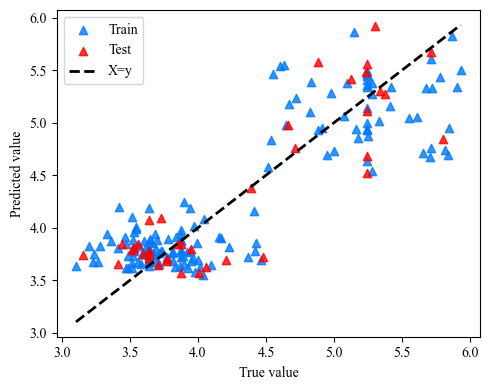

In [32]:
import numpy as np
import matplotlib.pyplot as plt

mean_value = 4.273130
std_value = 0.786799 

y_train_original = y_train * std_value + mean_value
y_train_pred_original = y_train_pred * std_value + mean_value

y_test_original = y_test * std_value + mean_value
y_pred_original = y_pred * std_value + mean_value

plt.figure(figsize=(5, 4))

plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')

min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X=y')

plt.xlabel('True value')
plt.ylabel('Predicted value')

plt.legend()

plt.tight_layout()
plt.savefig('Apr_TA_i.jpg', dpi=600)
plt.show()

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TA__scaler.xlsx")

model_features = {
    'RF': ['NB', 'L*','BplusG', 'C*'],
    'SVR': ['NB', 'BplusG'],
    'MLP': ['NB'],
    'XGBoost': ['NB', 'L*', 'BplusG', 'C*'],
    'LightGBM': ['NB', 'RminB', 'BplusG'],
}

all_required_features = list(set([f for features in model_features.values() for f in features]))

X = df[all_required_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = {
    'RF': {
        'model': RandomForestRegressor(
            n_estimators=30,
            max_depth=5,
            random_state=42
        ),
        'use_scaler': False
    },
    'SVR': {
        'model': SVR(
            kernel='linear',
            C=200,
        ),
        'use_scaler': False
    },
    'MLP': {
        'model': MLPRegressor(
            hidden_layer_sizes=(10, 5),
            activation='logistic',
            alpha=0.01,
            max_iter=100,
            random_state=42
        ),
        'use_scaler': False
    },
    'XGBoost': {
        'model': XGBRegressor(
            n_estimators=10,
            max_depth=5,
            learning_rate=0.1,
            random_state=42
        ),
        'use_scaler': False
    },
    'LightGBM': {
        'model': LGBMRegressor(
            n_estimators=30,
            max_depth=5,
            learning_rate=0.1,
            verbose=-1,
            random_state=42
        ),
        'use_scaler': False
    }
}

def generate_oof_predictions(model, X, y, features, n_splits=5):
    oof_preds = np.zeros(len(y))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for train_idx, val_idx in kf.split(X):
        X_train_fold = X.iloc[train_idx][features].values
        y_train_fold = y.iloc[train_idx].values.ravel()
        X_val_fold = X.iloc[val_idx][features].values
        
        model.fit(X_train_fold, y_train_fold)
        oof_preds[val_idx] = model.predict(X_val_fold)
    
    return oof_preds

optimized_models = {}

for name, model_info in base_models.items():
    print(f"\ntrain {name} model (feature: {model_features[name]})...")
    
    features = model_features[name]
    
    X_train_subset = X_train[features]
    
    model = model_info['model']
    model.fit(X_train_subset, y_train)
    
    optimized_models[name] = {
        'model': model,
        'features': features
    }

meta_features_train = []

for name, model_info in optimized_models.items():
    print(f"being {name} OOF...")
    oof_pred = generate_oof_predictions(
        model_info['model'], 
        X_train, 
        y_train, 
        model_info['features']
    )
    meta_features_train.append(oof_pred.reshape(-1, 1))

meta_features_train = np.hstack(meta_features_train)

meta_model = Lasso(random_state=42)

param_bayes = {
    'alpha': Real(0.035, 10, prior='log-uniform'),
    'fit_intercept': Categorical([True]),
}

bayes_search = BayesSearchCV(
    meta_model, 
    param_bayes, 
    n_iter=10,
    cv=5,
    scoring='r2', 
    random_state=42, 
    n_jobs=-1
)

bayes_search.fit(meta_features_train, y_train.values.ravel())
best_meta_model = bayes_search.best_estimator_

print(f"\nmodel-param: {bayes_search.best_params_}")
print(f"model-R2: {bayes_search.best_score_:.4f}")

meta_features_test = []

for name, model_info in optimized_models.items():
    model = model_info['model']
    features = model_info['features']
    
    model.fit(X_train[features].values, y_train.values.ravel())
    
    test_pred = model.predict(X_test[features].values).reshape(-1, 1)
    meta_features_test.append(test_pred)

meta_features_test = np.hstack(meta_features_test)

final_pred = best_meta_model.predict(meta_features_test)

test_r2 = r2_score(y_test, final_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
test_mae = mean_absolute_error(y_test, final_pred)

print("\ntest:")
print(f"R2评分: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

final_train_pred = best_meta_model.predict(meta_features_train)
train_r2 = r2_score(y_train, final_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
train_mae = mean_absolute_error(y_train, final_train_pred)

print("\ntrain:")
print(f"R2: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")


train RF model (feature: ['NB', 'L*', 'BplusG', 'C*'])...

train SVR model (feature: ['NB', 'BplusG'])...

train MLP model (feature: ['NB'])...

train XGBoost model (feature: ['NB', 'L*', 'BplusG', 'C*'])...

train LightGBM model (feature: ['NB', 'RminB', 'BplusG'])...
being RF OOF...
being SVR OOF...
being MLP OOF...
being XGBoost OOF...
being LightGBM OOF...

model-param: OrderedDict({'alpha': 0.03572595377319384, 'fit_intercept': True})
model-R2: 0.7863

test:
R2评分: 0.8077
RMSE: 0.4261
MAE: 0.3156

train:
R2: 0.8025
RMSE: 0.4476
MAE: 0.3453


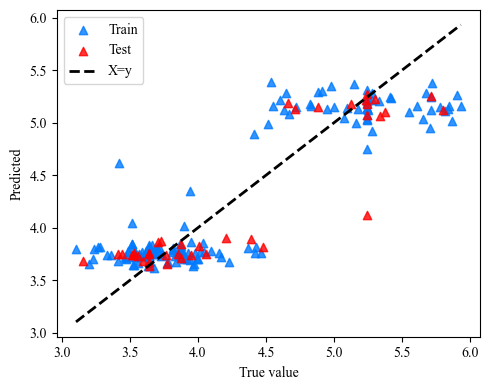

In [34]:
import numpy as np
import matplotlib.pyplot as plt

mean_value = 4.273130
std_value = 0.786799 

y_train_original = y_train * std_value + mean_value
y_train_pred_original = final_train_pred * std_value + mean_value

y_test_original = y_test * std_value + mean_value
y_pred_original = final_pred * std_value + mean_value

plt.figure(figsize=(5, 4))

plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')

min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X=y')

plt.xlabel('True value')
plt.ylabel('Predicted')
plt.legend()
plt.tight_layout()
plt.savefig('Apr_TA_j.jpg', dpi=300)
plt.show()

RF: 0.1439
SVR: 0.0043
MLP: 0.0000
XGBoost: 0.0602
LightGBM: 0.6111


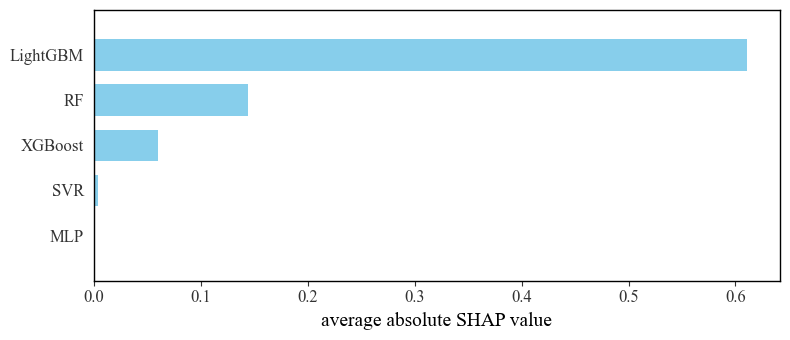

In [35]:
import shap
import matplotlib.pyplot as plt
import numpy as np

base_model_names = ['RF', 'SVR', 'MLP', 'XGBoost', 'LightGBM']

explainer = shap.LinearExplainer(best_meta_model, meta_features_train)
shap_values = explainer.shap_values(meta_features_test)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)


for model_name, shap_val in zip(base_model_names, mean_abs_shap):
    print(f"{model_name}: {shap_val:.4f}")

shap.summary_plot(
    shap_values, 
    meta_features_test, 
    feature_names=base_model_names,
    plot_type="bar",
    color='skyblue',  
    show=False
)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.xlabel("average absolute SHAP value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Apr_TA_k.png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()

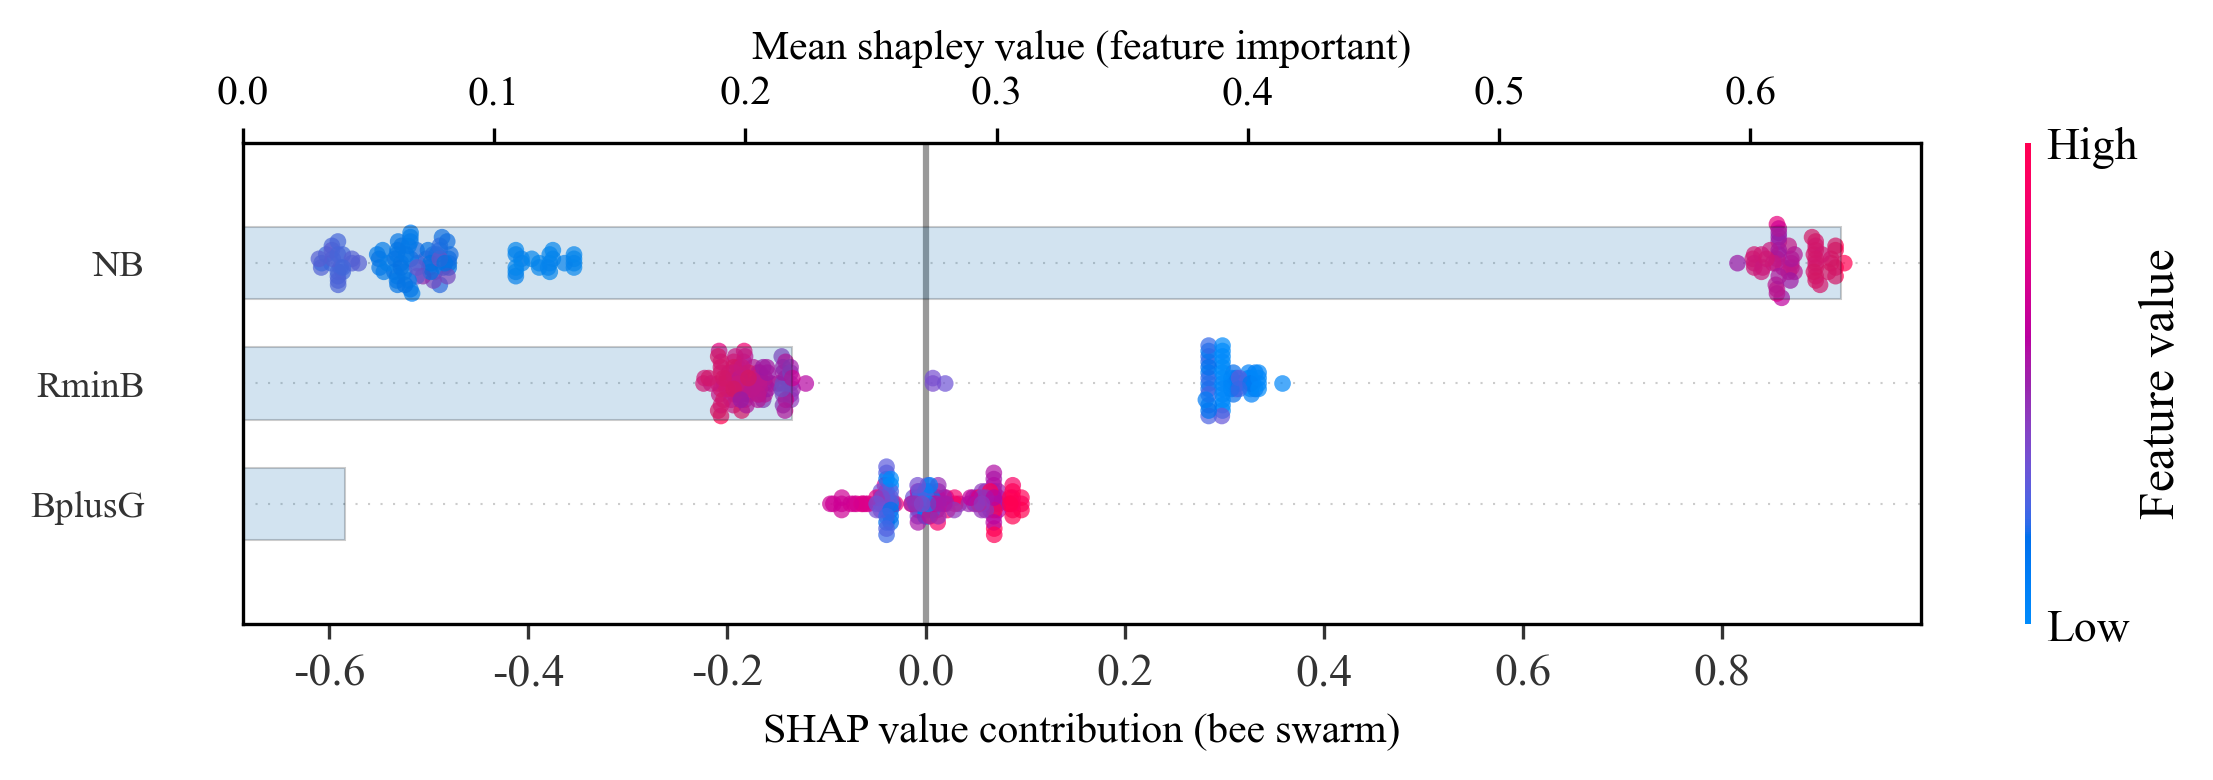

In [36]:
import shap
import matplotlib.pyplot as plt
import numpy as np

rf_model = optimized_models['LightGBM']['model']
rf_features = model_features['LightGBM']

X_train_rf = X_train[rf_features]

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_rf)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
sorted_indices = np.argsort(mean_abs_shap)[::-1]
sorted_features = [rf_features[i] for i in sorted_indices]

sorted_shap_values = shap_values[:, sorted_indices]
sorted_X_train = X_train_rf[sorted_features]
sorted_mean_abs = mean_abs_shap[sorted_indices]

plt.figure(figsize=(12, 8), dpi=300)
plt.rcParams.update({'font.size': 10, 'font.family': 'Times New Roman'})

shap.summary_plot(
    sorted_shap_values,
    sorted_X_train,
    feature_names=sorted_features,
    plot_type="dot",
    show=False,
    sort=False,
    alpha=0.7
)
ax1 = plt.gca()
ax1.set_ylabel('')
ax1.tick_params(axis='y', labelsize=9)
ax1.set_xlabel('SHAP value contribution (bee swarm)', fontsize=10)

ax2 = ax1.twiny()
ax2.grid(False)
ax2.set_ylim(ax1.get_ylim())

y_pos = np.arange(len(sorted_features))[::-1]  
bars = ax2.barh(
    y=y_pos,
    width=sorted_mean_abs,
    height=0.6,
    color='#1f77b4',
    alpha=0.2,
    edgecolor='black',
    linewidth=0.5
)

ax2.set_xlabel('Mean shapley value (feature important)', fontsize=10)
ax2.xaxis.set_label_position('top')
ax2.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False
)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('Apr_TA_l.png', bbox_inches='tight')
plt.show()

In [37]:
print("\nFeature importance (mean absolute SHAP value):")
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
for i, feature in enumerate(rf_features):
    print(f"{feature}: {mean_abs_shap[i]:.4f}")


Feature importance (mean absolute SHAP value):
NB: 0.6359
RminB: 0.2186
BplusG: 0.0408
